In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from covidimage import CovidImage
from classifier import Classifier

Using TensorFlow backend.


In [13]:
path = "data"
train_file = "data/train_split_v3.txt"
test_file = "data/test_split_v3.txt"

dataloader = CovidImage(path, train_file, test_file, img_size=64)

In [14]:
# dataloader._process_train_set()
# dataloader._process_test_set()

trainX, train_y, testX, test_y = dataloader.load_data()

Loading training data
Loading test data
Loading done


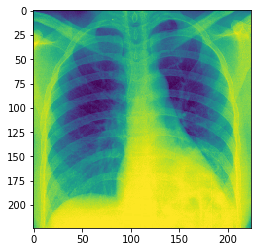

In [15]:
plt.imshow(dataloader.testX[0])


In [5]:
tf.__version__


'2.1.0'

In [6]:
trainX.shape

(13640, 224, 224)

In [7]:
EPOCHS = 25
INIT_LR = 0.003
BS = 32

In [8]:
#trainX = np.asarray(trainX, dtype="float")
#train_y = np.asarray(train_y)
trainX
#trainX.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2], 1)
trainX = np.expand_dims(trainX, axis=-1) 

In [9]:
trainX.shape

(13640, 224, 224, 1)

In [10]:
# one-hot encoding of classes
train_y = to_categorical(train_y, num_classes=3)

In [11]:
# data for validation
X_train, X_val, y_train, y_val = train_test_split(trainX, train_y, test_size=0.30, random_state=42)

KeyboardInterrupt: 

In [ ]:
X_train.shape

In [ ]:
model = Classifier.build(width=64, height=64, depth=1, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
              metrics=["accuracy"])

In [ ]:
print("Training network...")
loss_acc = model.fit(x=X_train, y=y_train,
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) // BS,
                    validation_steps=len(X_val) // BS,
                    epochs=EPOCHS, verbose=1)